# Preprocessing

In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import random

from collections import defaultdict

In [56]:
DATA_DIR = "/home/vivianea/projects/BrainInnov/data/npy_balanced_split"
SPLIT = "train"  # or "val", "test"
NUM_SAMPLES = 5

In [57]:
index_path = os.path.join(DATA_DIR, f"{SPLIT}_index.csv")
images_path = os.path.join(DATA_DIR, SPLIT)

In [58]:
samples = []
with open(index_path, newline="") as f:
    reader = csv.DictReader(f)
    for row in reader:
        samples.append((row["filename"], int(row["label"])))

# --- Pick random samples ---
random_samples = random.sample(samples, min(NUM_SAMPLES, len(samples)))

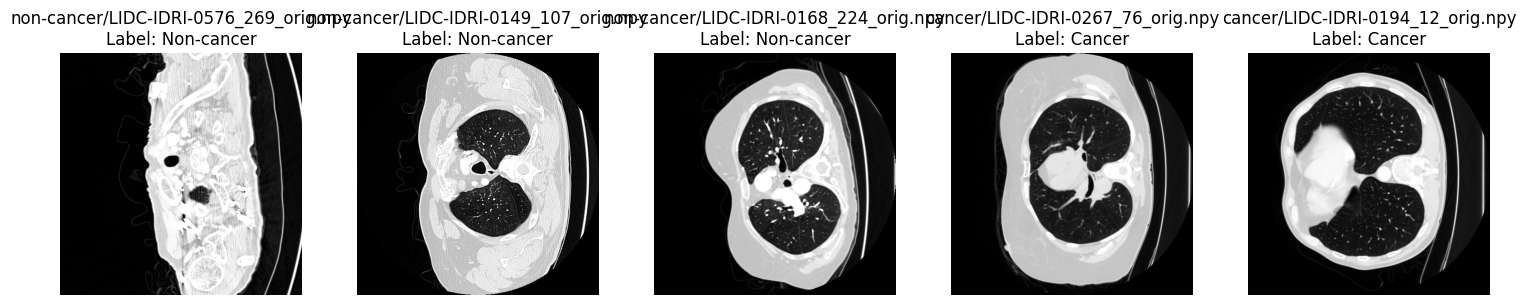

In [59]:
# --- Plot samples ---
fig, axes = plt.subplots(1, NUM_SAMPLES, figsize=(15, 3))
if NUM_SAMPLES == 1:
    axes = [axes]

for ax, (filename, label) in zip(axes, random_samples):
    img_path = os.path.join(images_path, filename)
    img = np.load(img_path).squeeze()  # remove channel dimension if needed
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{filename}\nLabel: {'Cancer' if label == 1 else 'Non-cancer'}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [60]:
# --- Configuration ---
SPLITS = ["train", "val", "test"]

def extract_patient_id(filename):
    # Extracts patient ID assuming filename format: "LIDC-IDRI-XXXX_sliceX.npy" or "LIDC-IDRI-XXXX_X_augY.npy"
    return filename.split('_')[0]

In [61]:
for split in SPLITS:
    index_path = os.path.join(DATA_DIR, f"{split}_index.csv")
    summary = defaultdict(list)  # label -> [patient_ids]

    with open(index_path, newline="") as f:
        reader = csv.DictReader(f)
        for row in reader:
            label = int(row["label"])
            label_str = "cancer" if label == 1 else "non-cancer"
            patient_id = extract_patient_id(row["filename"])
            summary[label_str].append(patient_id)

    # Count and deduplicate
    stat_path = os.path.join(DATA_DIR, f"{split}_summary.csv")
    with open(stat_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Class", "Num Samples", "Num Unique Patients"])
        for cls, patients in summary.items():
            writer.writerow([cls, len(patients), len(set(patients))])

    print(f"[✓] Saved summary for {split} to {stat_path}")

[✓] Saved summary for train to /home/vivianea/projects/BrainInnov/data/npy_balanced_split/train_summary.csv
[✓] Saved summary for val to /home/vivianea/projects/BrainInnov/data/npy_balanced_split/val_summary.csv
[✓] Saved summary for test to /home/vivianea/projects/BrainInnov/data/npy_balanced_split/test_summary.csv


In [62]:
sample_file = "/home/vivianea/projects/BrainInnov/data/npy_balanced_split/train/cancer/LIDC-IDRI-0068_30_orig.npy"
img = np.load(sample_file)

print("dtype:", img.dtype)
print("min:", img.min())
print("max:", img.max())
print("mean:", img.mean())
print("std:", img.std())

dtype: float32
min: 0.0
max: 255.0
mean: 97.05678
std: 107.9627


In [63]:
sample_file = "/home/vivianea/projects/BrainInnov/data/npy_balanced_split/train/non-cancer/LIDC-IDRI-0279_0_orig.npy"
img = np.load(sample_file)

print("dtype:", img.dtype)
print("min:", img.min())
print("max:", img.max())
print("mean:", img.mean())
print("std:", img.std())

dtype: float32
min: 0.0
max: 255.0
mean: 88.06908
std: 104.091125
